In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.special import i0, i1, k0, k1

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Abordaremos el problema del Phantom Dark Matter para el disco exponencial en z=0. 
Partiendo de la ecuación de Poisson, calcularemos la densidad de phantom dark matter para luego graficarla respecto al radio. Veremos qué sucede.

Primero construiremos las funciones de las derivadas primera y segunda del potencial gravitacional newtoniano para el disco exponencial en z=0.

In [2]:
## Definimos las constantes

G = 430007.1

a_0 = 4679.4 ## [kpc/Gyr^2]  

In [3]:
## Definimos las funciones de las derivadas primera y segunda del potencial en el perfil de Hernquist


def PrimeraPotencial(M, h, r):
    Sigma_0 = M / (2.0 * h * h)
    y = r / (2.0 * h)
    PrimeraPotencial = 2.0 * np.pi * G * Sigma_0 * y * (i0(y)*k0(y) - i1(y)*k1(y))
    return PrimeraPotencial

def SegundaPotencial(M, h, r):
    Sigma_0 = M / (2.0 * h * h)
    y = r / (2.0 * h)  
    SegundaPotencial = (np.pi * G * Sigma_0 / h) * (i0(y)*k0(y) - i1(y)*k1(y) - 2.0*i1(y)*k1(y) + y*(i1(y)*k0(y) 
                                                                                                     - i0(y)*k1(y)) )
    return SegundaPotencial

In [4]:
## Definimos la densidad de phantom dark matter para las funciones de interpolación de mu,

## R.A.R.

def mu_RAR(M, h, r):
    a = PrimeraPotencial(M, h, r)
    mu_RAR = 1.0 / (1.0 - np.exp( -np.sqrt(a / a_0) ) )
    return mu_RAR

def PDM_RAR(M, h, r):
    a = PrimeraPotencial(M, h, r)
    PDM_RAR = (1.0 / (4.0 * np.pi * G)) * (-mu_RAR(M, h, r) * mu_RAR(M, h, r) * np.exp(-np.sqrt(a/a_0))) / (2.0 * 
                np.sqrt(a_0 * a)) * SegundaPotencial(M, h, r) * a
    return PDM_RAR


## Simple

def mu_Simple(M, h, r):
    a = PrimeraPotencial(M, h, r)
    mu_Simple = 0.5 * (1 + np.sqrt(1.0 + 4.0*a_0/a))
    return mu_Simple

def PDM_Simple(M, h, r):
    a = PrimeraPotencial(M, h, r)
    PDM_Simple = (1.0 / (4.0 * np.pi * G)) * (-a_0 / (a * a * np.sqrt(1.0 + 4.0*a_0/a))) * SegundaPotencial(M, h, r) * PrimeraPotencial(M, h, r)
    return PDM_Simple



## Standard

def mu_Standar(M, h, r):
    a = PrimeraPotencial(M, h, r)
    mu_Standar = np.sqrt(0.5 * (1.0 + np.sqrt(1.0 + 4.0*a_0/a)))
    return mu_Standar

def PDM_Standard(M, h, r):
    a = PrimeraPotencial(M, h, r)
    PDM_Standard = (1.0 / (4.0 * np.pi * G)) * (-a_0 * a_0 /(mu_Standar(M, h, r) * a * a *a * np.sqrt(1.0 + 4.0*a_0*a_0/(a*a)))) * SegundaPotencial(M, h, r) * PrimeraPotencial(M, h, r)
    return PDM_Standard


In [5]:
## Definimos el vector de posición r y le damos un valor arbitrario a los parámetros

r = np.arange(0.1, 20.0, 0.05)

M = 1.0

h = 2.0

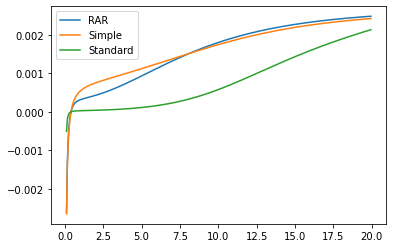

In [7]:
## Graficamos las respectivas densidades de PDM

plt.plot(r, PDM_RAR(M, h, r), label='RAR')
plt.plot(r, PDM_Simple(M, h, r), label='Simple')
plt.plot(r, PDM_Standard(M, h, r), label='Standard')
plt.legend()

(-0.003, 0.001)

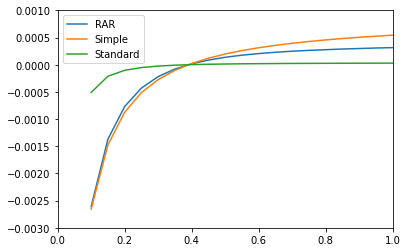

In [11]:
plt.plot(r, PDM_RAR(M, h, r), label='RAR')
plt.plot(r, PDM_Simple(M, h, r), label='Simple')
plt.plot(r, PDM_Standard(M, h, r), label='Standard')
plt.legend()
plt.xlim(0, 1.0)
plt.ylim(-0.003, 0.001)
